# Initial workflow

In this notebook we will explore the steps of detecting communities in a real-world network:
* Loading the Game of Thrones Season 1 network from a `graphml` file
* Plotting the network
* Runing community detection on the network and doing a basic inspection of the results
* Visualizing the detected communities and exploring other community detection methods
* Testing the stability of the results

---

In [1]:
import igraph as ig
import matplotlib
import random
import itertools
import numpy as np
ig.config["plotting.backend"] = "matplotlib"

In [2]:
# We import the local_random() function from this notebook
%run -i functions.ipynb

### Load the graph
First we start by loading the graph:

In [3]:
filename = "../networks/game_of_thrones/GoT.graphml"
g = ig.Graph.Read(filename)

### Plot the network
To ensure consistency across our visualizations, we'll first define and compute a single layout for our graph and fix the seed. We will then define a `style` dictionary to store the plot's settings, making them reusable for all our plots:

In [4]:
with local_random(seed=202):
    layout = g.layout("fr")
style = {'layout': layout, 'vertex_size': 10, 'edge_width': 0.3}

Now, we can plot the initial graph:

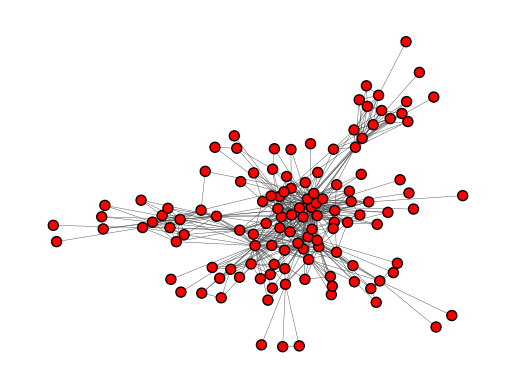

In [5]:
ig.plot(g, **style);

### Run community detection
Let's run community detection on the network, starting with the Leiden algorithm. This method detects communities by maximizing modularity. 
<div style="background-color: #e6ffe6; border-radius: 3px;">
    
_Note:_ You can find a more detailed explanation of **modularity** [here](./modularity.ipynb).
</div>
For the algorithm to consider edge weights during clustering, we need to pass the name of the edge attribute that contains the weights. In this case, we use "weight" as the parameter.

In [6]:
communities = g.community_leiden(objective_function="modularity", weights="weight")

#### Basic inspection and accessing data

`community_leiden`(and most of the community detection methods available in igraph) returns a `VertexClustering` object. 

From here we can access the membership vector. It's a list or array where each element corresponds to a vertex, and the value is the index of the cluster it belongs to.

<div style="background-color: #e6ffe6; border-radius: 5px;">
    
_Note:_ You can learn more about **memberhip vectors** [here](./membership_vector.ipynb).

</div>

In [7]:
print(communities.membership)

[0, 0, 2, 2, 3, 3, 0, 0, 2, 0, 4, 4, 5, 5, 0, 5, 0, 0, 0, 2, 0, 5, 3, 4, 4, 4, 5, 0, 0, 2, 0, 0, 3, 4, 3, 4, 2, 3, 2, 4, 5, 5, 2, 5, 4, 4, 2, 3, 0, 2, 5, 0, 3, 2, 0, 0, 4, 5, 5, 5, 2, 0, 0, 1, 1, 0, 0, 4, 0, 2, 0, 0, 3, 4, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 6, 6, 4, 5, 0, 0, 6, 0, 4, 4, 6, 5, 5, 0, 4, 4, 0, 4, 4, 2, 2, 5, 3, 3, 3, 3, 2, 4, 4, 0, 5, 3, 5, 0, 2, 4, 0, 3, 0, 0, 0, 3]


We can get the number of obtained communities:

In [8]:
print(f"Number of communities: {len(communities)}")

Number of communities: 7


And even accessing the clusters themself:

We can iterate over the object:

In [9]:
for i, cluster in enumerate(communities):
    print(f"Cluster {i} has {len(cluster)} vertices: {cluster}")

Cluster 0 has 43 vertices: [0, 1, 6, 7, 9, 14, 16, 17, 18, 20, 27, 28, 30, 31, 48, 51, 54, 55, 61, 62, 65, 66, 68, 70, 71, 74, 75, 76, 78, 79, 82, 83, 88, 89, 91, 97, 100, 113, 117, 120, 122, 123, 124]
Cluster 1 has 2 vertices: [63, 64]
Cluster 2 has 17 vertices: [2, 3, 8, 19, 29, 36, 38, 42, 46, 49, 53, 60, 69, 103, 104, 110, 118]
Cluster 3 has 19 vertices: [4, 5, 22, 32, 34, 37, 47, 52, 72, 77, 80, 81, 106, 107, 108, 109, 115, 121, 125]
Cluster 4 has 23 vertices: [10, 11, 23, 24, 25, 33, 35, 39, 44, 45, 56, 67, 73, 86, 92, 93, 98, 99, 101, 102, 111, 112, 119]
Cluster 5 has 18 vertices: [12, 13, 15, 21, 26, 40, 41, 43, 50, 57, 58, 59, 87, 95, 96, 105, 114, 116]
Cluster 6 has 4 vertices: [84, 85, 90, 94]


Or index it to get the vertex IDs within a specific cluster:

In [10]:
first_cluster = communities[0]
print(f"\nVertices in the first cluster: {first_cluster}")


Vertices in the first cluster: [0, 1, 6, 7, 9, 14, 16, 17, 18, 20, 27, 28, 30, 31, 48, 51, 54, 55, 61, 62, 65, 66, 68, 70, 71, 74, 75, 76, 78, 79, 82, 83, 88, 89, 91, 97, 100, 113, 117, 120, 122, 123, 124]


Alternatively, print the communities, listing the names of the nodes within each:

In [11]:
print(communities)

Clustering with 126 elements and 7 clusters
[0] NED, ROBERT, LITTLEFINGER, VARYS, ARYA, CERSEI, JOFFREY, SANSA, PYCELLE,
    SEPTA_MORDANE, LORAS, RENLY, SYRIO_FOREL, JORY_CASSEL, BARRISTAN, YOREN,
    HOUND, LANCEL, JANOS, GENDRY, MERYN_TRANT, JON_ARRYN, STANNIS, MYCAH,
    TOBHO_MOTT, MHAEGEN, AERYS, BAELOR, STABLE_BOY, HUGH_OF_THE_VALE,
    MOUNTAIN, TOMARD, RICKARD_STARK, ILYN_PAYNE, LYANNA, RHAEGAR, BERIC,
    HIGH_SEPTON, TOMMEN, MACE, ROOSE_BOLTON, STEFFON, VARLY
[1] HOT_PIE, LOMMY_GREENHANDS
[2] DAENERYS, JORAH, DROGO, VISERYS, MIRRI_MAZ_DUUR, DOREAH, IRRI, RAKHARO,
    QOTHO, ILLYRIO, WINE_MERCHANT, RHAEGO, MAGO, COHOLLO, JHIQUI, IROGENIA,
    LITTLE_BIRD
[3] JON, SAM, JEOR, PYP, GRENN, BENJEN, MAESTER_AEMON, ALLISER_THORNE, RAST,
    DAREON, OTHELL_YARWYCK, OTHOR, AEGON, BORCAS, BOWEN_MARSH, LUKE,
    JAREMY_RYKKER, MELESSA, RANDYLL
[4] CATELYN, ROBB, THEON, BRAN, MAESTER_LUWIN, ROS, WALDER, GREATJON_UMBER,
    OSHA, RODRIK, RICKON, HODOR, OLD_NAN, JONOS_BRACKEN, RYGER_RIVERS

### Visualize detected communities

Now we can visualize the obtained clusters using a simple `igraph` visualization technique. First, we will define a color map, and then we will add the `vertex_color` property to the `style` dictionary. This will allow us to color the nodes based on their communities:

Found 7 communities (modularity: 0.5290)


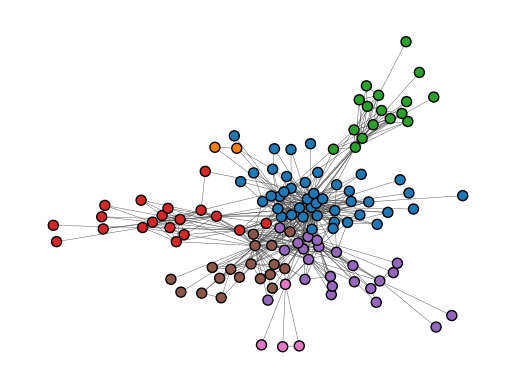

In [12]:
colors_map = matplotlib.colormaps["tab10"]
style['vertex_color'] = [colors_map(cluster) for cluster in communities.membership]
print(f"Found {len(communities)} communities (modularity: {communities.modularity:.4f})")
ig.plot(g, **style);

### Exploring other community detection algorithms (optional)

Now, we can try out some other community detection methods as well, such as the Louvain and Label Propagation algorithms:

Found 5 communities (modularity: 0.3563)


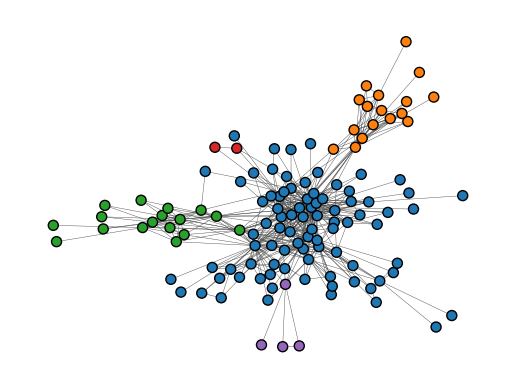

In [13]:
communities = g.community_label_propagation(weights="weight")
style['vertex_color'] = [colors_map(cluster) for cluster in communities.membership]
print(f"Found {len(communities)} communities (modularity: {communities.modularity:.4f})")
ig.plot(g, **style);

### Test the stability of the result
Next, we can test the stability of the Leiden algorithm's result by:

Generating multiple partitions:

In [14]:
partitions = []
for _ in range(500):
    partitions.append(g.community_leiden(objective_function="modularity", weights="weight"))

Calculating pairwise NMI _(Normalized Mutual Information)_ values (a value of 1 means that the two partitions are identical, a high value - close to 1 - means that they are similar, a low value means that they are dissimilar):

In [15]:
def calculate_pairwise_nmi_values(partitions):
    pairwise_nmi_values = []
    for p1, p2 in itertools.combinations(partitions, 2):
        nmi = ig.compare_communities(p1, p2, method='nmi')
        pairwise_nmi_values.append(nmi)
    return pairwise_nmi_values

pairwise_nmi_values = calculate_pairwise_nmi_values(partitions)

Plotting the results on a histogram:

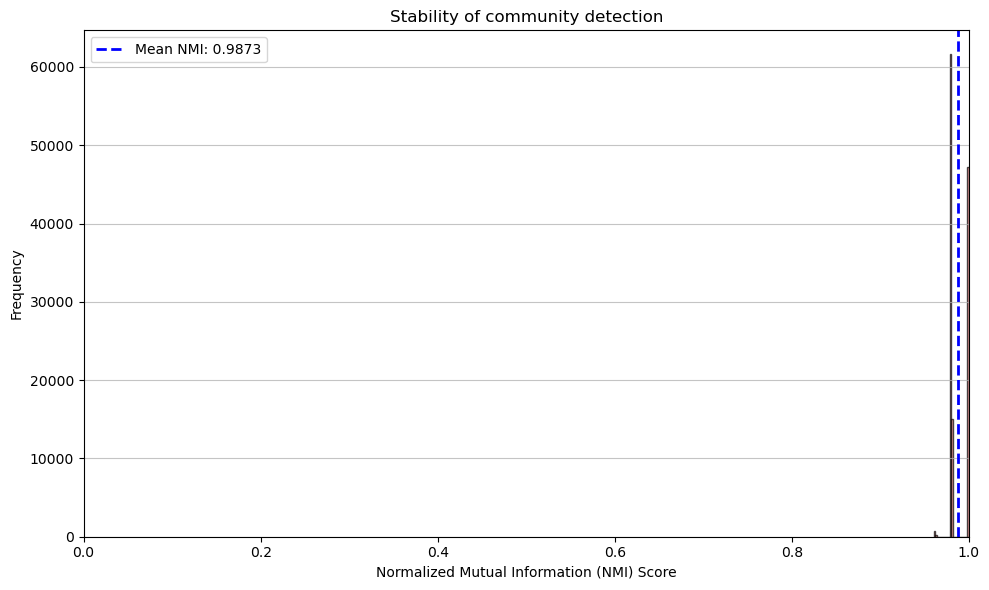

In [16]:
def plot_pairwise_nmi_values(pairwise_nmi_values):
    plt = matplotlib.pyplot
    plt.figure(figsize=(10, 6))
    plt.hist(pairwise_nmi_values, bins=20, edgecolor='black', alpha=0.7, color='lightcoral')
    plt.xlabel('Normalized Mutual Information (NMI) Score')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
        
    # Set x-axis limits from 0 to 1
    plt.xlim(0, 1)
    
    # Add a line for the mean NMI
    mean_nmi = np.mean(pairwise_nmi_values)
    plt.axvline(mean_nmi, color='blue', linestyle='dashed', linewidth=2, label=f'Mean NMI: {mean_nmi:.4f}')
    
    plt.title('Stability of community detection')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_pairwise_nmi_values(pairwise_nmi_values)

The same test can be performed on the Label Propagation Algorithm using the functions built previously.

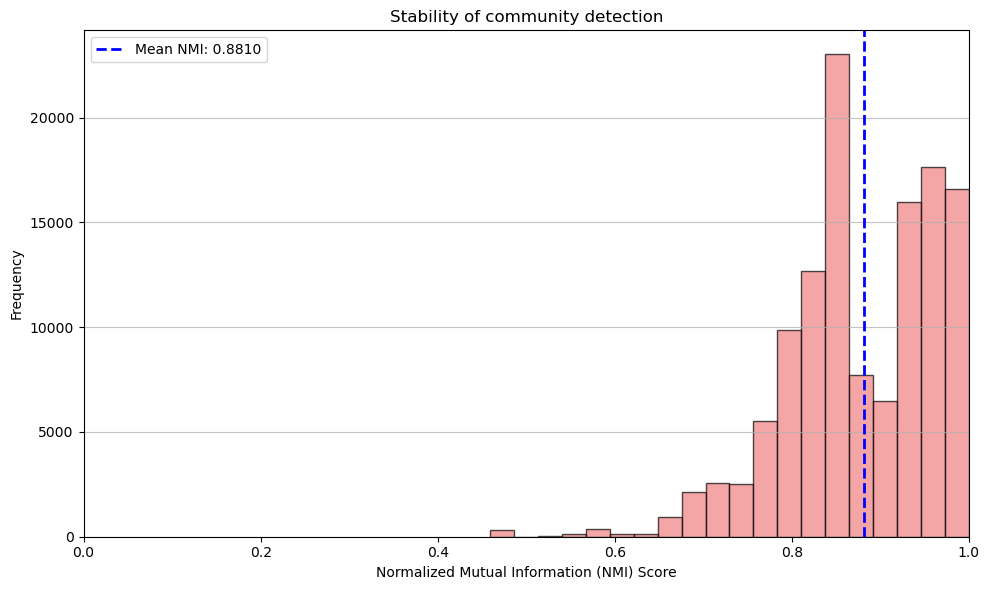

In [17]:
partitions = []
for _ in range(500):
    partitions.append(g.community_label_propagation(weights="weight"))
pairwise_nmi_values = calculate_pairwise_nmi_values(partitions)
plot_pairwise_nmi_values(pairwise_nmi_values)

_Note:_ Our previous testing suggests that the Label Propagation Algorithm performs less efficiently on this network than the Leiden Algorithm. While this type of testing can be applied to any clustering method, it is important to remember that it may not always be the best way to evaluate the performance of community detection algorithms. It is always beneficial to critically examine and interpret the generated results, especially when you have prior knowledge of the network's structure.

<div style="background-color: #e6ffe6; padding: 20px; border-radius: 5px;">

* **Note on Community Significance:** Now that we've successfully identified and visualized communities within our network, a critical next step is to assess their significance. It's important to ask: are these detected structures truly meaningful, or could they have arisen by random chance? Furthermore, for algorithms with stochastic elements (like Leiden), how consistent are the results across different runs? A detailed exploration of how to test the significance of communities can be found in the notebook [here](./test_significance_of_community.ipynb).

* **Note on Algorithms:** Various algorithms are available in `igraph` for community detection. They are categorized by their underlying principles and suited for various scenarios. In the community detection methods listed above, weights are interpreted as stronger connections, but this is not always the case with other methods. For a more thorough description of these methods and recommendations on when to use each, you can refer to the notebook [here](./community_detection_algorithms.ipynb).

* **Note on Visualizations:** The possibilities for visualizing **communities** are endless. For examples of various community visualization techniques, please refer to the notebook [here](./generating_and_visualizing_clusters.ipynb).

* **Note on Algorithm Stability:** When running community detection algorithms like Leiden, you might notice that each execution yields a different result. This variability is due to the inherent stochastic nature of the Leiden algorithm. If you're wondering how to arrive at a more stable and consistent result, consensus clustering provides the solution. A detailed description and example of how consensus clustering works can be found [here](./consensus_clustering.ipynb).

* **Note on local seeds:** Many `igraph` algorithms, such as the Leiden algorithm, rely on random processes. To ensure a specific part of your analysis is reproducible without affecting the rest of your notebook, you can use a custom utility function, such as `local_random()`, imported from [here](./functions.ipynb).

For example:
```python
with local_random(seed=123):
    g.community_leiden()
```

</div>